# Energy Price Prediction Using RNN


This notebook outlines the steps to build and train a Recurrent Neural Network (RNN) for predicting energy prices based on historical data.


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import LSTM, GRU
 

In [2]:
import matplotlib.pyplot as plt

## Load and Prepare the Data

In [3]:
# Load the dataset
data = pd.read_csv('data/cleaned_data_v2.csv')  # Update this to your file path

# Convert 'hour_number_dec' to datetime and then to a numerical feature (timestamp)
data['hour_number_dec'] = pd.to_datetime(data['hour_number_dec'])
data['timestamp'] = data['hour_number_dec'].values.astype(np.int64) // 10 ** 9

# Selecting features and target
X = data[['timestamp', 'demand', 'capacity']]
y = data['price']

# Scaling features
scaler = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler.fit_transform(X)

# Reshape input to be [samples, time steps, features]
X_scaled = np.reshape(X_scaled, (X_scaled.shape[0], 1, X_scaled.shape[1]))
    

## Split the Data

In [4]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [5]:
len(X_train), len(X_test)

(1747, 437)

## Define and Train the RNN Model

In [6]:
# RNN model architecture
model = Sequential()
# Assuming X_scaled is previously defined and has the correct shape

# First LSTM layer with return_sequences=True to output sequences for the next layer
model.add(LSTM(units=60, activation='relu', return_sequences=True, input_shape=(1, X_scaled.shape[2])))

# Second LSTM layer, also returning sequences
model.add(LSTM(units=60, activation='relu', return_sequences=True))

model.add(LSTM(units=60, activation='relu', return_sequences=False))
# model.add(LSTM(units=60, activation='relu', return_sequences=True))
# The GRU layer was experiemented with but the pure LSTM layer was found to be more effective

# GRU layer; since it's not followed by another recurrent layer, return_sequences can be False (default)
# model.add(GRU(units=60, activation='relu'))

# Output layer
model.add(Dense(units=1))

# Compile the model
# model.compile(optimizer='rmsprop', loss='mean_squared_error')
model.compile(optimizer=Adam(learning_rate=0.01), loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)
    

2024-03-23 12:28:18.874853: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2024-03-23 12:28:18.874892: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-03-23 12:28:18.874903: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-03-23 12:28:18.874958: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-03-23 12:28:18.874982: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
/Users/parth/Documents/repos/msci446-final-proj/venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a

Epoch 1/100


2024-03-23 12:28:19.831370: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step - loss: 1051.2157 - val_loss: 301.4771
Epoch 2/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 260.0996 - val_loss: 175.5861
Epoch 3/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 215.5335 - val_loss: 160.7922
Epoch 4/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 208.2920 - val_loss: 147.5063
Epoch 5/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 263.2428 - val_loss: 149.1075
Epoch 6/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 188.9375 - val_loss: 231.1896
Epoch 7/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 222.1512 - val_loss: 144.4986
Epoch 8/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 223.7856 - val_loss: 158.2901
Epoch 9/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 214.6780 - val_loss: 156.0880
Epoch 10/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 246.3942 - val_loss: 166.4957
Epoch 11/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 237.9583 - val_loss: 147.8853
Epoch 12/100
44/44 

## Evaluate the Model

In [7]:
# Evaluate the model on the training and test set
train_loss = model.evaluate(X_train, y_train, verbose=0)
test_loss = model.evaluate(X_test, y_test, verbose=0)

# Convert losses from MSE to RMSE for more interpretable results
train_loss_rmse = np.sqrt(train_loss)
test_loss_rmse = np.sqrt(test_loss)

# Predictions for training and test set
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate R^2 score for training and test set
from sklearn.metrics import r2_score
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f'Training Loss (RMSE): {train_loss_rmse}')
print(f'Test Loss (RMSE): {test_loss_rmse}')
print(f'Training R^2 Score: {train_r2}')
print(f'Test R^2 Score: {test_r2}')


55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Training Loss (RMSE): 12.80243149551153
Test Loss (RMSE): 13.427631959836706
Training R^2 Score: 0.4209199472818492
Test R^2 Score: 0.38642886415793043


In [8]:
X

,timestamp,demand,capacity
0,1702083600,14149,27275
1,1702087200,13664,27333
2,1702090800,13325,27244
3,1702094400,13157,27133
4,1702098000,13242,26984
...,...,...,...
2179,1709928000,16761,25445
2180,1709931600,16279,25990
2181,1709935200,15620,26612
2182,1709938800,14834,26954


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


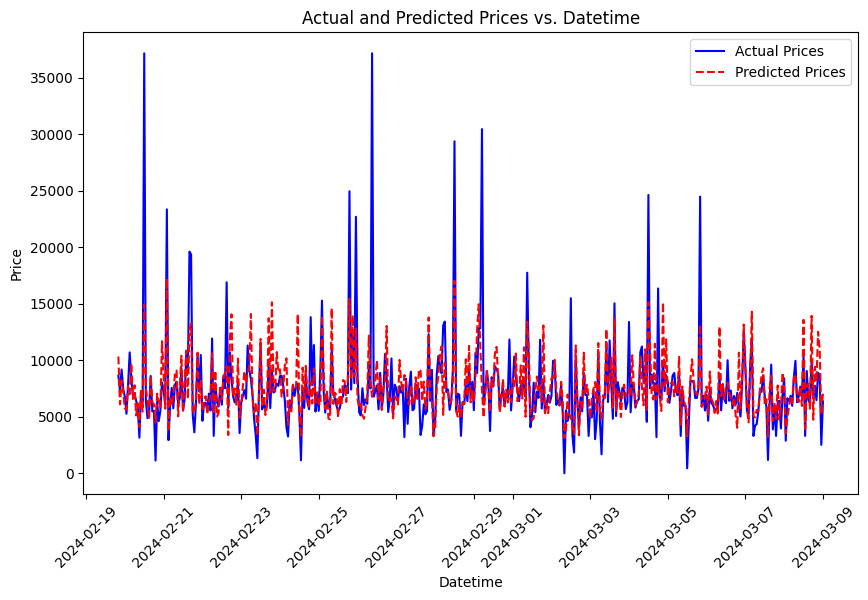

In [12]:
# Assuming your RNN model is named 'model'
# Generate predictions for the test set
test_predictions = model.predict(X_test)
y_scaler = MinMaxScaler(feature_range=(0, 1))
y_scaled = y_scaler.fit_transform(y.values.reshape(-1, 1))

test_predictions_inverse = y_scaler.inverse_transform(test_predictions)
y_test_inverse = y_scaler.inverse_transform(y_test.values.reshape(-1, 1))


data['hour_number_dec'] = pd.to_datetime(data['timestamp'], unit='s')

timestamps_test = data.iloc[len(X_train):len(X_scaled)]['hour_number_dec']

# Plotting the actual prices vs. datetime with blue line
plt.figure(figsize=(10, 6))
plt.plot(timestamps_test, y_test_inverse, label='Actual Prices', color='blue')

# Plotting the predicted prices vs. datetime with red dashed line
plt.plot(timestamps_test, test_predictions_inverse, 'r--', label='Predicted Prices')

plt.xlabel('Datetime')
plt.ylabel('Price')
plt.title('Actual and Predicted Prices vs. Datetime')
plt.legend()
plt.xticks(rotation=45)  # Rotate date labels for better readability
plt.savefig('actual_vs_predicted_prices_rnn.png')
plt.show()
